Nesse código foram desenvolvidos 9 gráficos. Incluindo gráficos do tipo:
Boxplot
Histograma
Gráfico de dispersão
Gráfico de pizza
Gráfico de barras
Gráfico de linha
Os gráficos trouxeram insights valiosos baseados em um dataset de um RH. Cada gráfico tem um textinho acima que descreve os insights interpretados em cada um.

Feito por: Pedro Henrique Leal Vieira
Fábrica de Software 2025.1

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Importei o drive pra ter acesso ao arquivo

In [4]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/dados_rh.csv')

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


Dropei as colunas EmployeeCount e StandardHours pois não estavam agregando para criação dos gráficos pois ambos tinham apenas um valor. EmployeeCount tinha apenas o valor "1" e StandardHours "80".


In [10]:
df = df.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [29]:
df.shape

(1470, 34)

Verifiquei os tipos de dados

In [28]:
df.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeNumber,int64
EnvironmentSatisfaction,int64


Me certifiquei de que não haviam valores nulos para poder prosseguir.



In [27]:
df.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeNumber,0
EnvironmentSatisfaction,0


Decidi fazer um gráfico do tipo boxplot pra verificar se havia relação entre a distância de casa e a saída de funcionários. Com base no gráfico, a distância de casa não parece ser um fator determinante para a saída dos funcionários. Se houvesse uma distância grande entre a linha média, veríamos a caixa de "Yes" muito diferente da de "No".

Text(0.5, 1.0, 'Distância de Casa vs. Demissões')

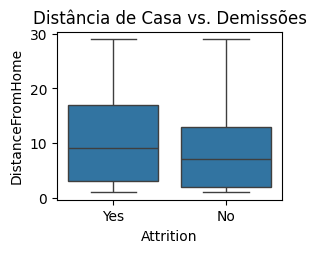

In [26]:
plt.subplot(2, 2, 2)
sns.boxplot(x="Attrition", y="DistanceFromHome", data=df)
plt.title("Distância de Casa vs. Demissões")

Agora analisando a relação entre tempo na empresa e saídas da empresa podemos notar que quanto menos tempo na empresa, maior a chance de sair. Podesse observar também que a partir dos 20 anos de empresa quase não há demissões

Text(0.5, 1.0, 'Anos de Trabalho vs. Demissões')

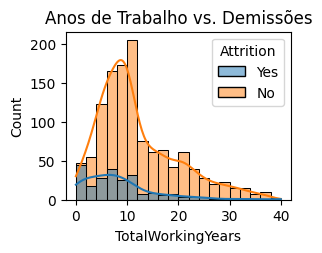

In [25]:
plt.subplot(2, 2, 3)
sns.histplot(df, x="TotalWorkingYears", hue="Attrition", kde=True, bins=20)
plt.title("Anos de Trabalho vs. Demissões")

O gráfico sugere que o nível de educação, não tem uma relação clara com o salário diário.
1 → Ensino Médio
2 → Técnico
3 → Graduação
4 → Mestrado
5 → Doutorado

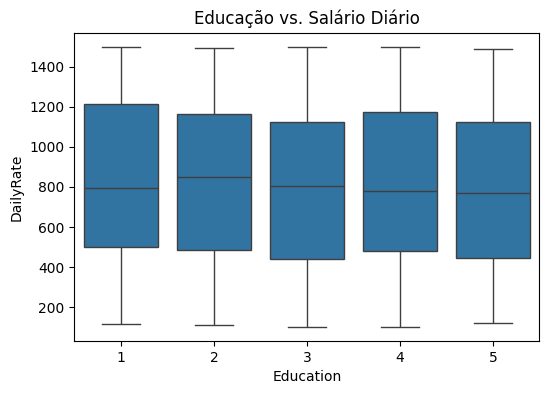

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Education", y="DailyRate", data=df)
plt.title("Educação vs. Salário Diário")
plt.show()

Com base nesse gráfico podemos concluir que o tempo de empresa tem certo impacto no salário dos funcionarios. Isso pode ser percebido pelo grande vazio na parte inferior do gráfico principalmente após os 20 anos de empresa.

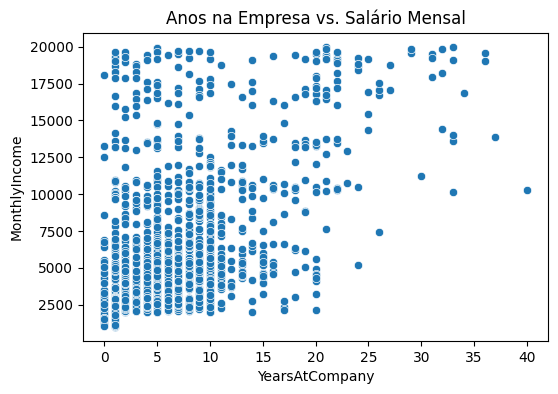

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="YearsAtCompany", y="MonthlyIncome", data=df)
plt.title("Anos na Empresa vs. Salário Mensal")
plt.show()

Com base no gráfico, podemos perceber que o cargo tem grande influência sobre o salário. Healthcare Representative Managers e Research Directors ganham significativamente mais do que os demais cargos. Sales Representative é o cargo que ganha menos.

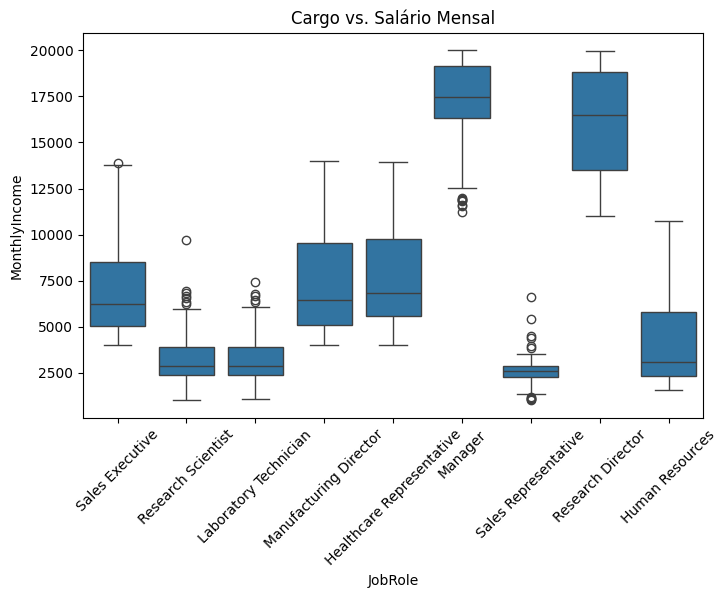

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x="JobRole", y="MonthlyIncome", data=df)
plt.xticks(rotation=45)
plt.title("Cargo vs. Salário Mensal")
plt.show()

Nesse gráfico podemos ver que a maioria dos funcionários da empresa são do sexo masculino.

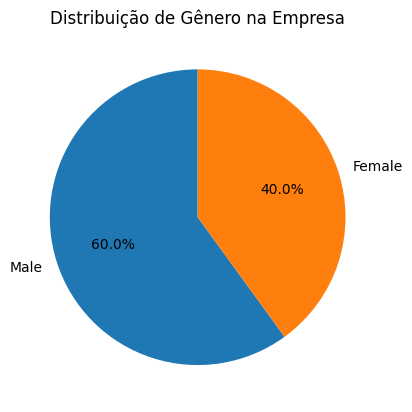

In [21]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribuição de Gênero na Empresa")
plt.ylabel("")
plt.show()

Nesse gráfico podemos perceber que a maioria dos funcionários deixa a empresa após 10 anos. Essa informação pode ser importante para que, por exemplo, a empresa possa tomar medidas voltadas a esses funcionários para evitar que eles saiam da empresa.

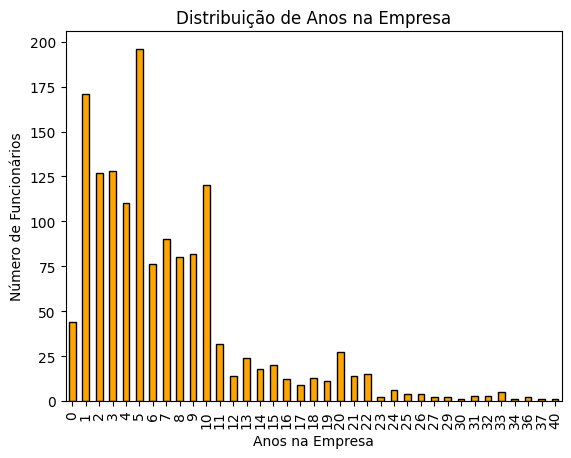

In [20]:
df['YearsAtCompany'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Distribuição de Anos na Empresa")
plt.xlabel("Anos na Empresa")
plt.ylabel("Número de Funcionários")
plt.show()

Outro gráfico mostrando a evolução do salário de acordo com o tempo de empresa. Nele podemos perceber que apesar de algumas exceções (Como aos 30 e 40 anos), o tempo de empresa impacta sim quanto os funcionários recebem.

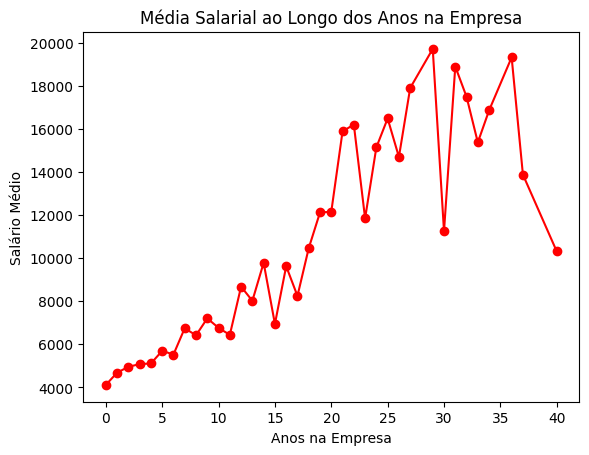

In [19]:
df.groupby("YearsAtCompany")["MonthlyIncome"].mean().plot(kind="line", marker="o", color="red")
plt.title("Média Salarial ao Longo dos Anos na Empresa")
plt.xlabel("Anos na Empresa")
plt.ylabel("Salário Médio")
plt.show()

Com base no gráfico abaixo podemos perceber que a maioria dos funcionários tem por volta de 30-35 anos. O gráfico trás informações relevantes para empresa pois pode por exemplo indicar que algum funcionários estão próximos de sse aposentar e etc.

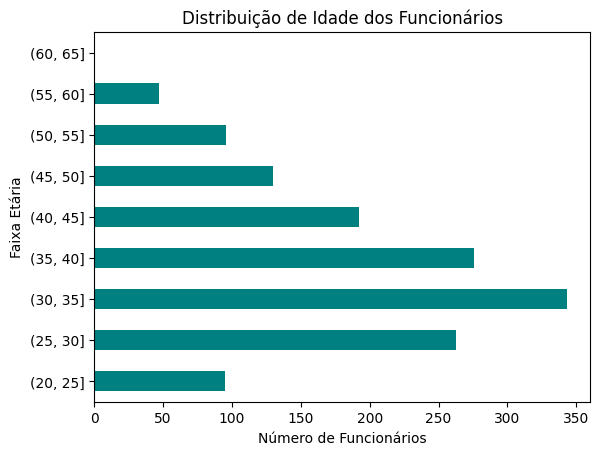

In [18]:
age_bins = np.arange(20, 70, 5)
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

df['AgeGroup'].value_counts().sort_index().plot(kind="barh", color="teal")
plt.title("Distribuição de Idade dos Funcionários")
plt.xlabel("Número de Funcionários")
plt.ylabel("Faixa Etária")
plt.show()

In [12]:
idademedia = df['Age'].mean()
print("A média das idades dos funcionários é:", idademedia)

A média das idades dos funcionários é: 36.923809523809524


In [13]:
tempomedio = df['YearsAtCompany'].mean()
print("A média de tempo dos funcionários na empresa é:", tempomedio)

A média de tempo dos funcionários na empresa é: 7.0081632653061225


(O Nível da satisfação vária entre 1-4)

In [14]:
satisfacaomedia = df['JobSatisfaction'].mean()
print("A média do nível de satisfação no trabalho é:", satisfacaomedia)

A média do nível de satisfação no trabalho é: 2.7285714285714286
